<a href="https://colab.research.google.com/github/ALdoMartineCh16/Analisis-Exploratorio-de-Datos-Espaciales/blob/main/SESION_16_AEDE_METODO_DE_MONTECARLO_Y_CADENAS_DEMARKOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1QyjJW7NL2WDfnVZ0_MqAfH6Slkal1DJA" width="150">

$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Ciencia \ de \ la \ Computación \ UNSA}$

---

# <center>  $Capitulo \ 6$


### <center> $Método \ MCMC$


**Sesión de Laboratorio 14 :** Método de Montecarlo y cadenas de Markov **MCMC**

**Profesor:** ......................................

**Estudiante:** .........................................

---





# **Metodo de aceptacion y rechazo**

Este método permite generar muestras de una distribucion de probabilidad con funcion de ddensidad $f(x)$ (dificil de muestrear directamente) utilizando una distribucion auxilar $g(x)$ (facil de muestrear)

Suponemos que $X$ y $Y$ son dos variables aleatorias con funciones de densidad      $f, g$   respectivamente  y que existe una constante  $c$ tal que   


$$\frac{f(x)}{g(x)}\leq c $$

$\forall x$ talque $f(x)>0$

El método del rechazo utiliza una función de densidad $g(x)$ para la cual sabemos generar números aleatorios (por ejemplo una distribucion uniforme), y que además recubre por completo la función de densidad que queremos obtener

$$f(x)≤c·g(x)$$


El algoritmo para generar valores a partir de $g(x)$ sería el siguiente:

1. Envolver $f(x)$ con una funcion $g(x)$ talque
   $f(x)≤c·g(x)$, con $c\geq 1$
2. Muestrear un valor $Y$ de $g(y)$ y un valor $U \in [0,1]$
3. Aceptar $y$ si           
  
   $$u \leq\frac{f(y)}{c·g(y)} \leq 1$$

  de lo contrario rechazar


Para que funcione eficientemente, el algoritmo debe utilizar una función $g(x)$ sencilla, y que se ajuste lo más posible a la función $f(x)$. De ella dependerá el número de iteraciones del algoritmo.






**Ejemplo:** Consideremos la funcion de densidad $f(x)=2x, 0<x<1$

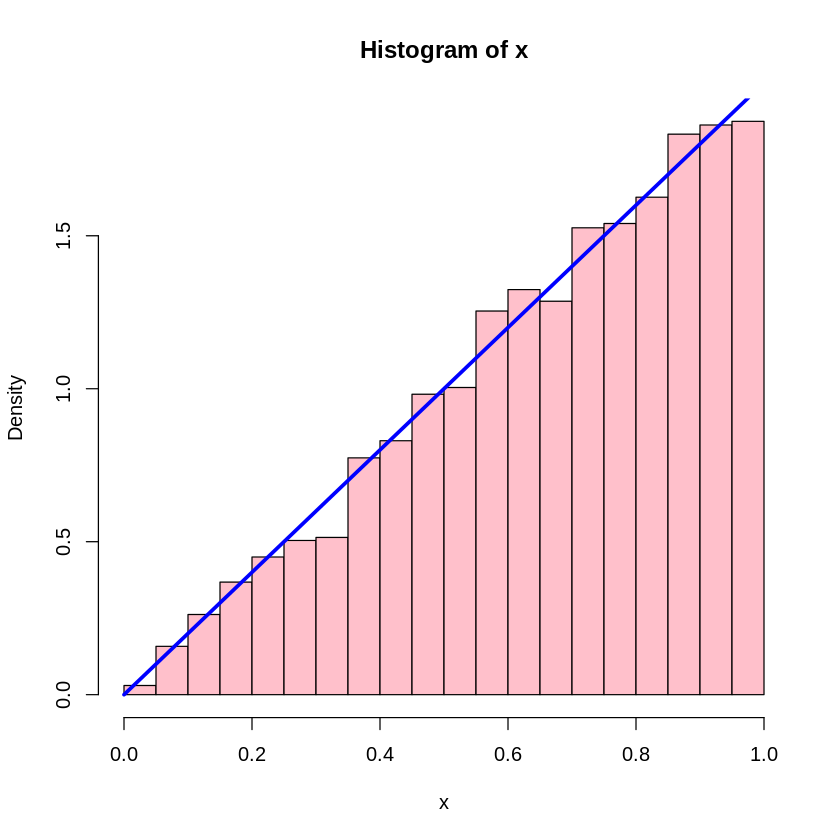

In [ ]:
f = function(x) 2*x
# Constante c (máximo de f(x)/g(x))
c= 2  # Aproximado visualmente
N=10000
x=numeric(N)
i=0
while (i < N) {
  Y=runif(1)  # Muestra de g(x)
  U=runif(1)  # Uniforme para decisión, g(Y) = 1 (Uniforme)
  if (U <= f(Y) / (c * 1))
  {
    i=i + 1
    x[i]= Y
  }
}

# Visualización
hist(x, col="pink", freq = FALSE)
curve(f(x), add = TRUE, col = "blue", lwd = 3)

**Ejemplo:** Consideremos la funcion de densidad $f(x)=20x(1-x)^3, 0<x<1$

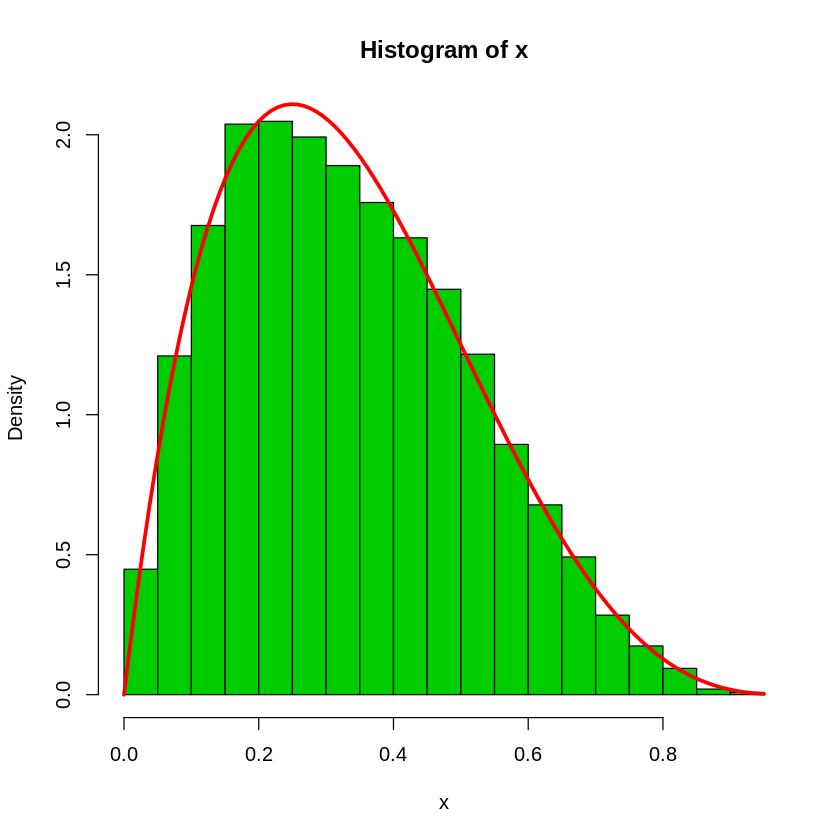

In [ ]:
f = function(x) 20*x*(1-x)^3
# Constante c (máximo de f(x)/g(x))
c= 135/64  # Aproximado visualmente
N=10000
x=numeric(N)
i=0
while (i < N) {
  Y=runif(1)  # Muestra de g(x)
  U=runif(1)  # Uniforme para decisión,  g(Y) = 1 (Uniforme)
  if (U <= f(Y) / (c * 1))
  {
    i=i + 1
    x[i]= Y
  }
}

# Visualización
hist(x,col="green3", freq = FALSE)
curve(f(x), add = TRUE, col = "red", lwd = 3)

# **Monte Carlo con Cadenas de Markov (MCMC)**

El algoritmo de Markov Chain Monte Carlo (MCMC) combina ambos métodos: genera simulaciones mediante cadenas de Markov para aproximar distribuciones complicadas (como posteriori en Bayes).


Una cadena de Markov es un proceso estocástico, para el cual la sucesión  $\left\{X_t / t \geq 0\right \}$ que describe dicho proceso debe verificar la siguiente condición

$$P[X_{t+1}=x/ X_t=x_t,X_{t-1}=x_{t-1},,...,X_1=x_1,X_0=x_0]=P[X_{t+1}=x/ X_t=x_t]$$

esta cadena se construye para que eventualmente $X_t$ siga una distribucion deseada $\pi(x)$

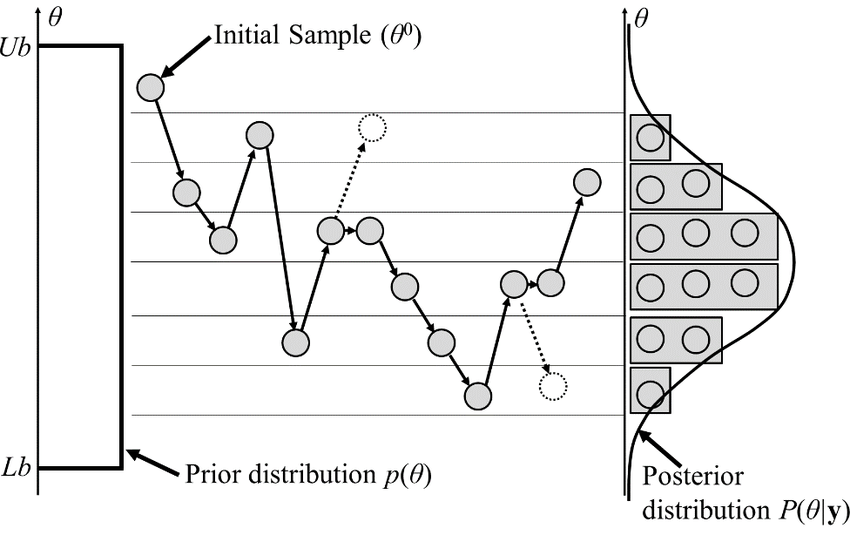

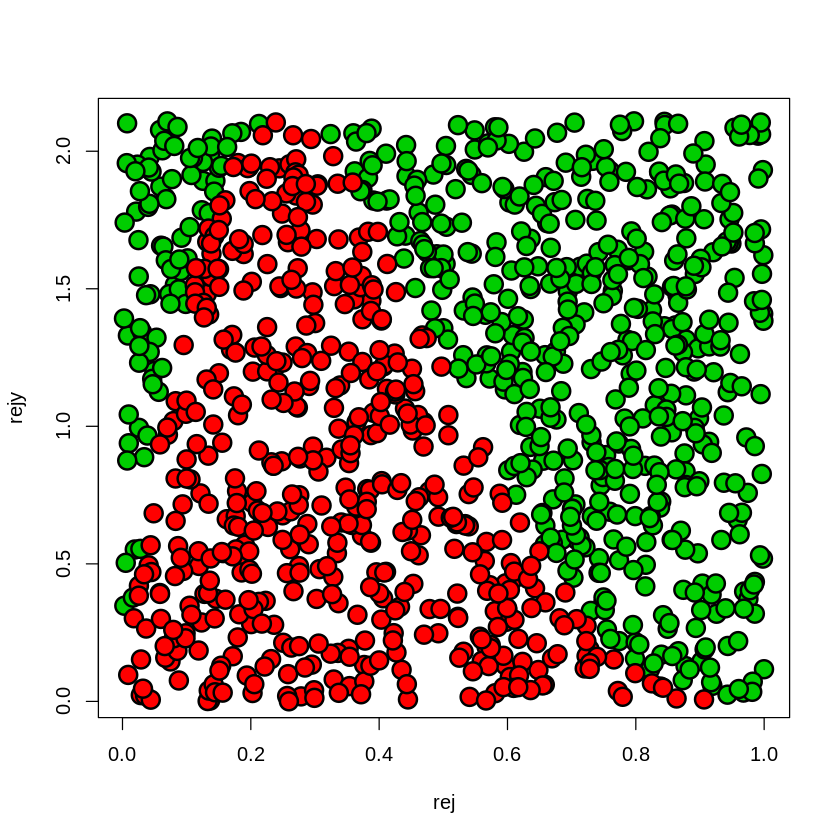

In [ ]:

c=135/64
n =500

x =matrix(0,1,n)
xy =matrix(0,1,n)
rej=matrix(0,1,n)
rejy=matrix(0,1,n)
irv = 1
irej = 1
while (irv <= n){
y = runif(1)
u = runif(1)

 if (u <= 20*y*(1-y)^3/c){

#if (u <= 2*y/c){
    x[irv] = y
    xy[irv] = u*c
    irv = irv+1}
  else
    {
    rej[irej] = y
    rejy[irej] = u*c #  u*c<=2*y
     irej = irej + 1
}
}
plot(rej,rejy,pch=21,cex=2,bg="green3",lwd=2)
points(x,xy,pch=21,cex=2,bg="red",lwd=2)

vamos a  utilizar una cadena de Markov para generar una secuencia de valores  $x_0,x_1,...,x_n$  de tal manera que cuando $n → \infty $,$x_n \sim \pi(x)$. Hay muchos metodos de configurar una cadena de Markov con esta propiedad. El algoritmo de Metropolis-Hastings es uno de estos metodos

Una cadena de Markov será reversible en el tiempo y tendrá probabilidades estacionarias si

$$\pi(i)P_{i,j}=\pi(j)P_{j,i}$$

lo cual es equivalente a

$$\pi(i)q(i,j)\alpha(i,j)=\pi(j)q(j,i)\alpha(j,i)$$

de aqui se satisface que

$$\alpha(i,j)=min \left \{ 1,\frac{\pi (j)q(j,i)}{\pi (i)q(i,j)} \right \}$$


$$\pi(x)P_{x,x'}=\pi(x')P_{x',x}$$

lo cual es equivalente a

$$\pi(x)q(x'|x)\alpha(x',x)=\pi(x')q(x|x')\alpha(x,x') \  \  balance$$


$$\alpha(x'|x)=min \left \{ 1,\frac{\pi (x')q(x|x')}{\pi (x)q(x'|x)} \right \}$$


$f(x) \propto \pi(x)$

En el caso particular del algoritmo de Metropolis-Hasting  $q(x'|x)$ es simetrica entonces $q(x'|x)=q(x|x')$


en el muestreo por rechazo se requiere una funcion $cg(x)$  que acote $\pi(x)$, el algoritmo Metropolis solo compara razones $\frac{\pi (x')}{\pi (x)}$

**Algoritmo Metropolis**

1. Elegir un punto inicial $x_0$
2. Paso $t$
* Generar una propuesta $x' \sim q(x'|x_t)$ distribución propuesta la normal centrada en $x_t$, $N(x_t,\sigma^2)$
* Calcular el cociente de aceptación

$$\alpha=min \left \{ 1,\frac{\pi (x')}{\pi (x_t)} \right \}$$

* Aceptar la propuesta con probabilidad $\alpha$

La probabilidad de aceptaciónse implementa generando un numero aleatorio $u \sim U(0,1)$

* Si $u< \alpha$ aceptamos $x'$
* Si $u\geq  \alpha$ rechazamos $x'$

asi se garantiza que se cumple el balance

 i) Si se acepta, $x_{t+1}=x'$

 ii) Si no se acepta, $x_{t+1}=x_t$


---

**Ejemplo 1**

Simular la distribucion $\pi(x)\propto e^{-x^4+3x^2}$ usando el metodo de Metropolis

**Paso 1:** $\pi(x)=e^{-x^4+3x^2}$ y tomamos $x_0=0$

In [ ]:
phi=function(x) {
  exp(-x^4 + 3 * x^2)
}

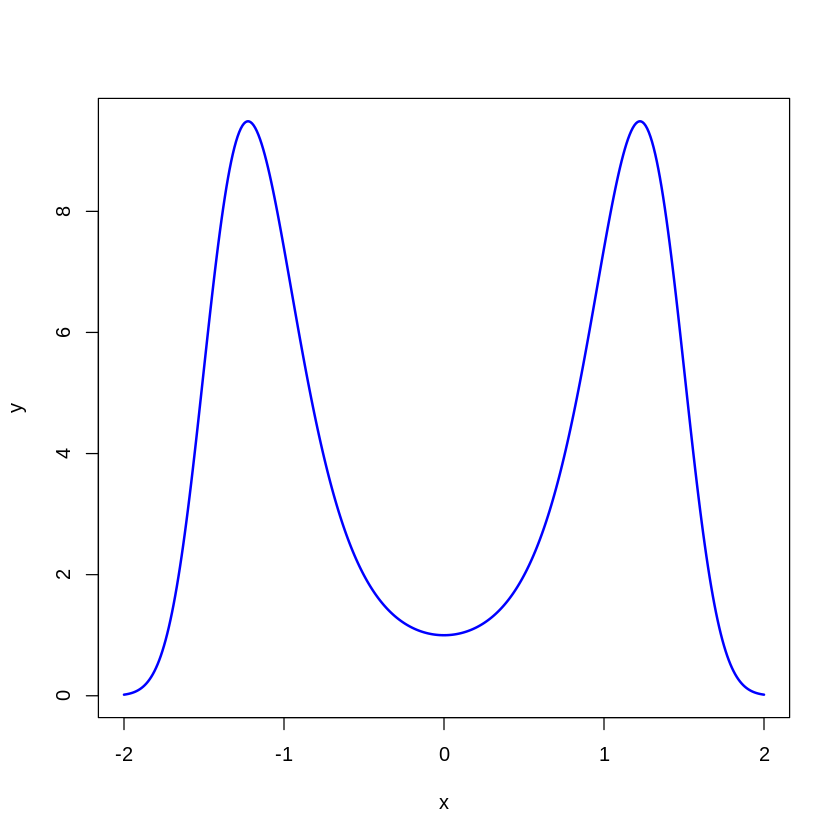

In [ ]:
x=seq(-2,2,0.01)
y=phi(x)
plot(x,y,type='l',col="blue",lwd=2)

In [ ]:
x0=0
phi(x0)

[1] 1

**Paso 2:** Eleccion propuesta

$$q(x'|x)=N(x_t,\sigma^2)$$

es decir $x'\sim N(x_0,\sigma^2)$ con $\sigma =1$

tenemos que hallar $x_1$

In [ ]:
set.seed(655)
sigma=1
xp=rnorm(1,x0,sigma)
xp

[1] 0.7954806

**Paso 3:**  $\alpha = min \left\{ 1, \frac{\pi (x')}{\pi(x_0)} \right\} $

In [ ]:
phi(x0)
phi(xp)
alfa=min(1,phi(xp)/phi(x0))
alfa

[1] 1

[1] 4.472492

[1] 1

aceptamos $x_1=x'=0.7955$

In [ ]:
x1=xp
x1

[1] 0.7954806

**Paso 4:** Nuevo paso de la cadena $x'\sim N(x_1,\sigma^2)$ con $\sigma =1$

tenemos que hallar $x_2$

In [ ]:
set.seed(655)
sigma=1
xp=rnorm(1,x1,sigma)
xp

[1] 1.590961

In [ ]:
phi(x1)
phi(xp)
alfa=min(1,phi(xp)/phi(x1))
alfa

[1] 4.472492

[1] 3.276297

[1] 0.7325438

In [ ]:
set.seed(655)
u=runif(1)
u
u<alfa

[1] 0.786833

[1] FALSE

aceptamos $x_2=x_1=0.7951$

In [ ]:
x2=x1
x2

[1] 0.7954806

**Paso 5:** Nuevo paso de la cadena $x'\sim N(x_2,\sigma^2)$ con $\sigma =1$

tenemos que hallar $x_3$

In [ ]:
set.seed(656)
sigma=1
xp=rnorm(1,x2,sigma)
xp

[1] -0.2698358

In [ ]:
phi(x2)
phi(xp)
alfa=min(1,phi(xp)/phi(x2))
alfa

[1] 4.472492

[1] 1.237549

[1] 0.2767023

In [ ]:
set.seed(651)
u=runif(1)
u
u<alfa

[1] 0.2420668

[1] TRUE

aceptamos $x_3=-0.2698$

asi cosntruimos la cadena de Markov

$$x_0=0, \  x_1=0.7955, \ x_2=0.7955, \ x_3=-0.2698, \ x_4= ...$$

In [ ]:
phi=function(x) {
  exp(-x^4 + 3 * x^2)
}
# Algoritmo de Metropolis
metropolis=function(N = 10000, sigma = 1, x0 = 0) {
  x=numeric(N)
  x[1]=x0
  for (t in 2:N) {
    xp=rnorm(1,x[t - 1],sigma)
    alpha=min(1,phi(xp)/phi(x[t - 1]))
    #print(alpha)
    if (runif(1) < alpha) {
      x[t]=xp
    } else {
      x[t]=x[t - 1]
    }
  }
 return(x)
}

In [ ]:
set.seed(655)
samples=metropolis(N = 10000, sigma = 1, x0 = 0)

In [ ]:
samples[0:5]

[1]  0.0000000  0.7954806  0.7954806 -0.9085669 -1.6135096

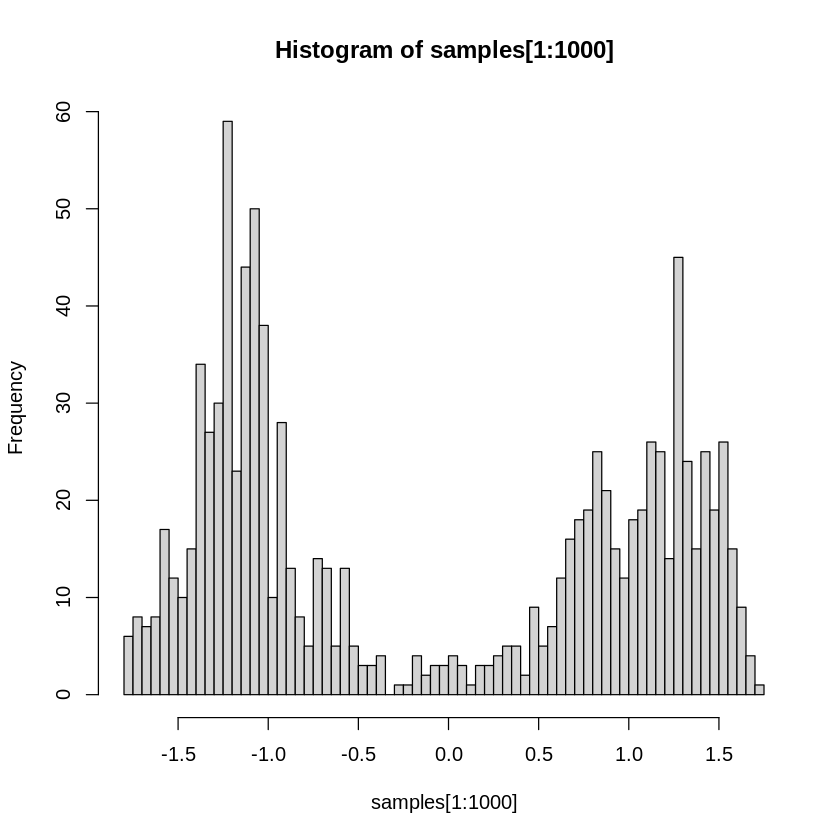

In [ ]:
hist(samples[1:1000],breaks=50)

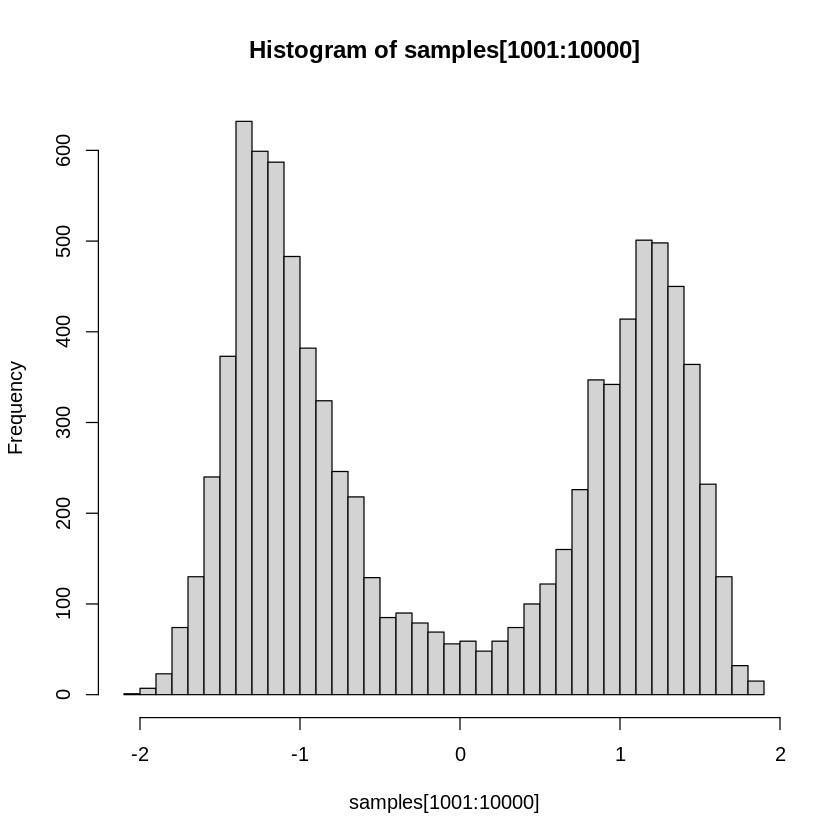

In [ ]:
hist(samples[1001:10000],breaks=50)

 [1]  0.000 -0.560  0.630  0.700  0.591  1.052  1.052  1.052  1.052  1.453
[11]  1.691  1.691  1.691  1.691  0.958  0.740  0.740  0.115 -0.031  0.123


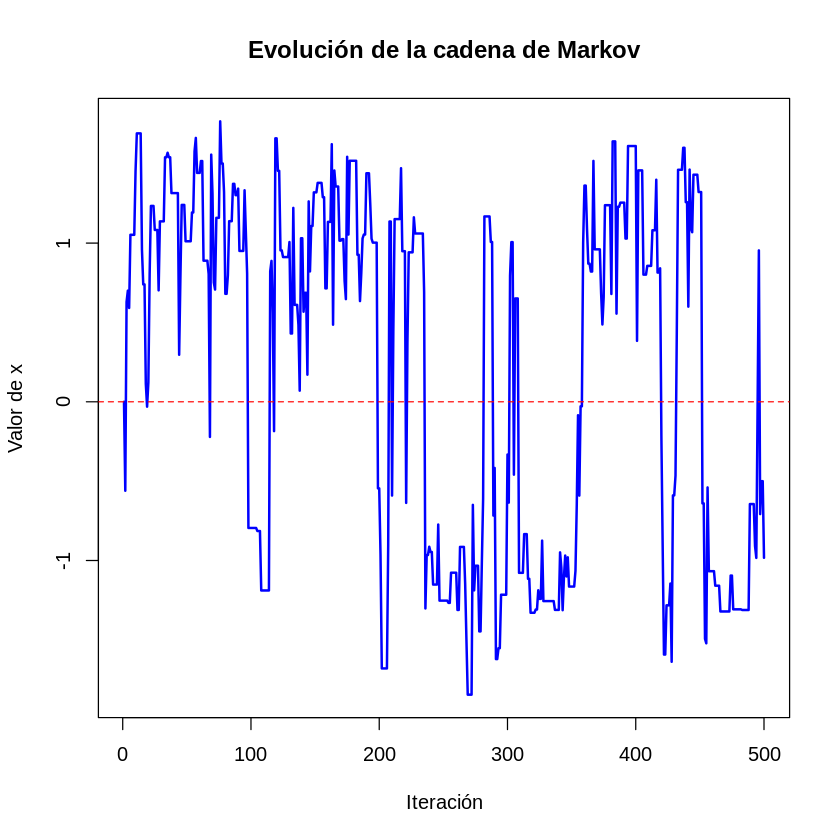

In [ ]:
set.seed(123)
samples= metropolis(N = 500, sigma = 1, x0 = 0)
# Mostrar los primeros 20 valores
print(round(samples[1:20], 3))
# Gráfico de la cadena
plot(samples, type = "l", col = "blue", lwd = 2,
     main = "Evolución de la cadena de Markov",
     xlab = "Iteración", ylab = "Valor de x")
abline(h = 0, col = "red", lty = 2)

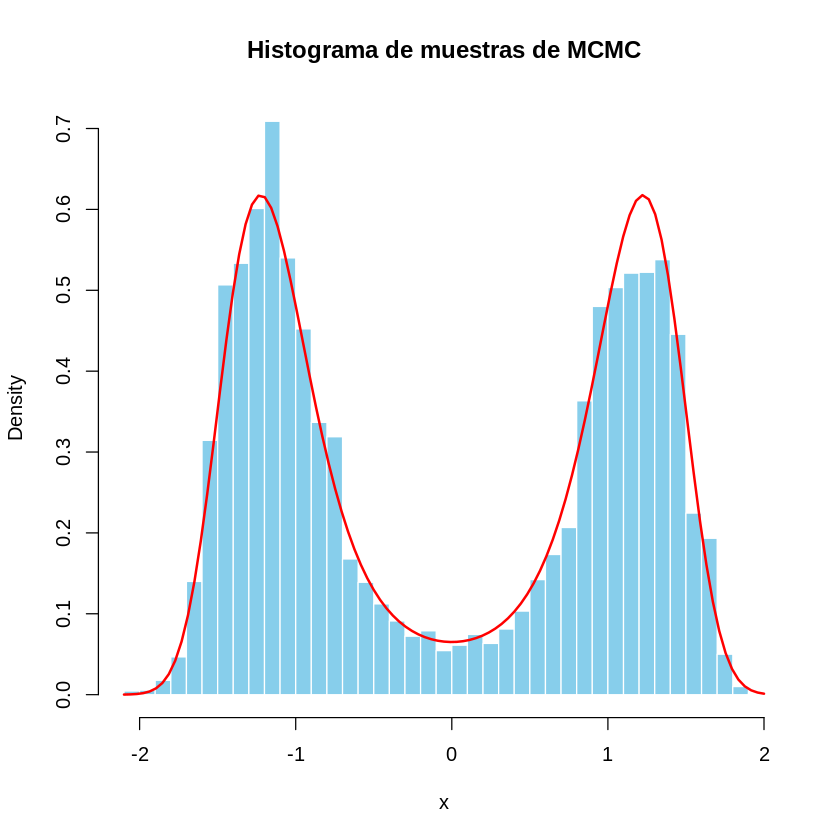

In [ ]:
set.seed(123)
muestra1=metropolis(N = 10000, sigma = 1, x0 = 0)
rango=1000
m=muestra1[(rango + 1):length(muestra1)]
hist(m, breaks = 50, probability = TRUE,
     main = "Histograma de muestras de MCMC",
     xlab = "x", col = "skyblue", border = "white")
# Superponer función objetivo (escalada)
curve(phi(x) / integrate(Vectorize(phi), -Inf, Inf)$value,
      add = TRUE, col = "red", lwd = 2)

In [ ]:
integrate(function(x) exp(-x^4 + 3 * x^2), -Inf, Inf)

15.35988 with absolute error < 0.00029

Una funcion no esta normalizada si

$$\int_{-\infty}^{+\infty}f(x)dx \neq 1$$

si necesitamos normalizarla en $[a,b]$ su normalizacion $f_{norm}$ se define como

$$f_{norm}(x)= \frac{f(x)}{C}$$

$$C=\int_a^bf(x)dx$$

asi

$$\int_a^bf(x)dx = 1$$





**Ejemplo 2** Simular la distribucion $\pi(x)\propto e^{-x^2/2}(1+cos(3x))$ usando el metodo de Metropolis

In [ ]:
phi=function(x) {
  exp(-x^2/2)*(1+cos(3*x))
}

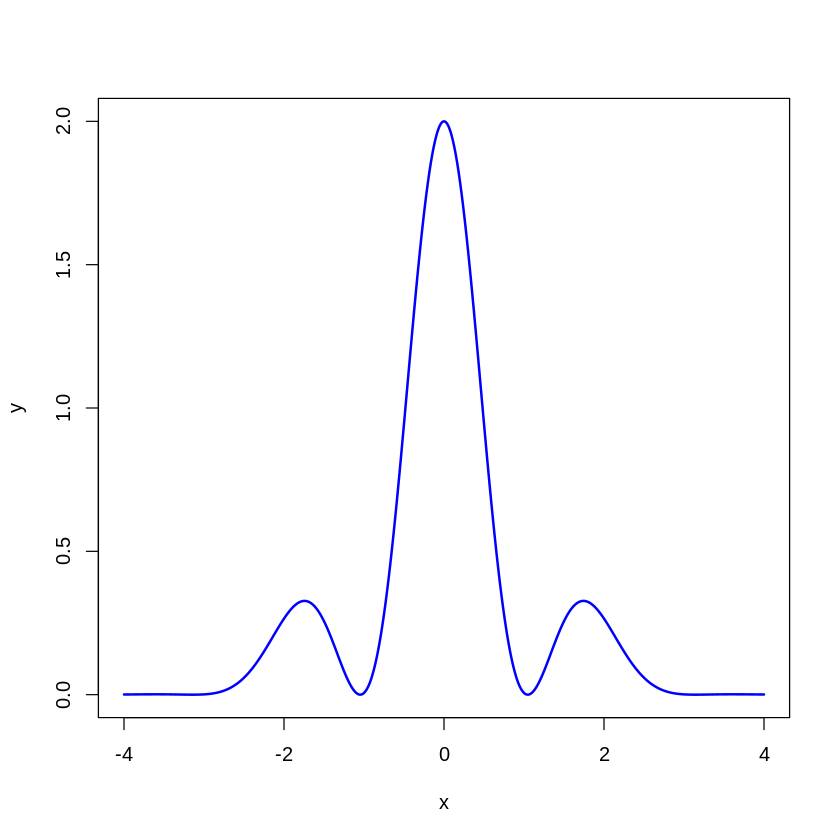

In [ ]:
x=seq(-4,4,0.01)
y=phi(x)
plot(x,y,type='l',col="blue",lwd=2)

In [ ]:
phi=function(x) {
  exp(-x^2/2)*(1+cos(3*x))
}
# Algoritmo de Metropolis
metropolis=function(N = 10000, sigma = 1, x0 = 0) {
  x=numeric(N)
  x[1]=x0
  for (t in 2:N) {
    xp=rnorm(1,x[t - 1],sigma)
    alpha=min(1,phi(xp)/phi(x[t - 1]))
    #print(alpha)
    if (runif(1) < alpha) {
      x[t]=xp
    } else {
      x[t]=x[t - 1]
    }
  }
 return(x)
}

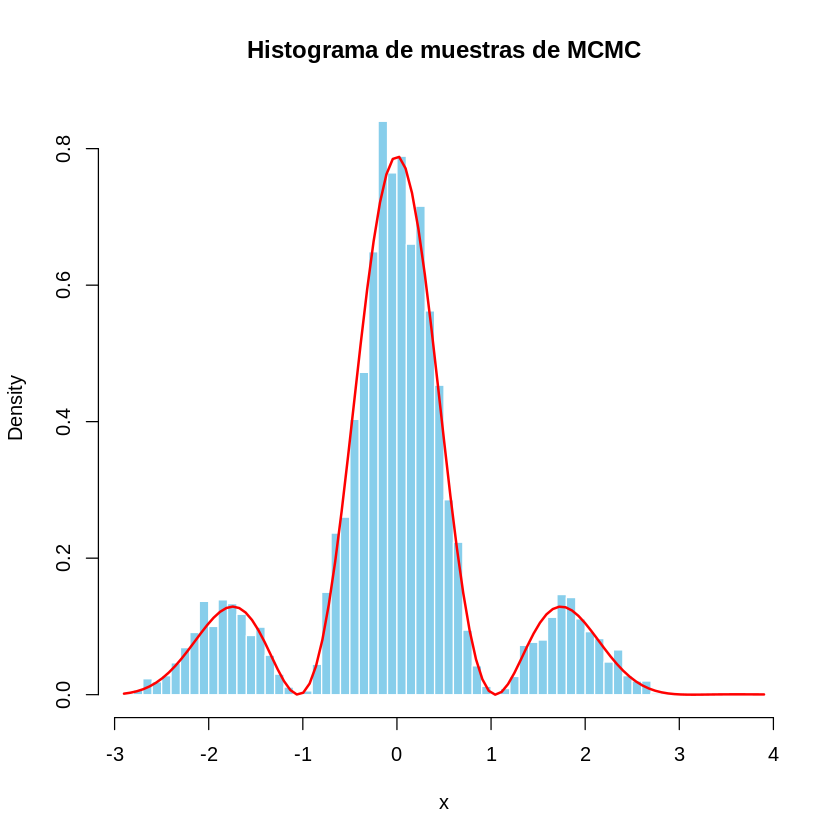

In [ ]:
set.seed(123)
muestra1=metropolis(N = 10000, sigma = 1, x0 = 0)
rango=1000
m=muestra1[(rango + 1):length(muestra1)]
hist(m, breaks = 50, probability = TRUE,
     main = "Histograma de muestras de MCMC",
     xlab = "x", col = "skyblue", border = "white")
# Superponer función objetivo (escalada)
curve(phi(x) / integrate(Vectorize(phi), -Inf, Inf)$value,
      add = TRUE, col = "red", lwd = 2)

**Algoritmo Metropolis-Hastings**

1. Elegir un punto inicial $x_0$
2. Paso $t$
* Generar una propuesta $x' \sim q(x'|x_t) $ distribución propuesta la normal centrada en $x_t$, $N(x_t,\sigma^2)$
* Calcular el cociente de aceptación

$$\alpha=min \left \{ 1,\frac{\pi (x')q(x_t|x')}{\pi (x_t)q(x'|x_t)} \right \}$$

* Aceptar la propuesta con probabilidad $\alpha$

 i) Si se acepta, $x_{t+1}=x'$

 ii) Si no se acepta, $x_{t+1}=x_t$


In [ ]:
phi=function(x) {
  exp(-x^2 / 2) * (1 + sin(3 * x))^2
}

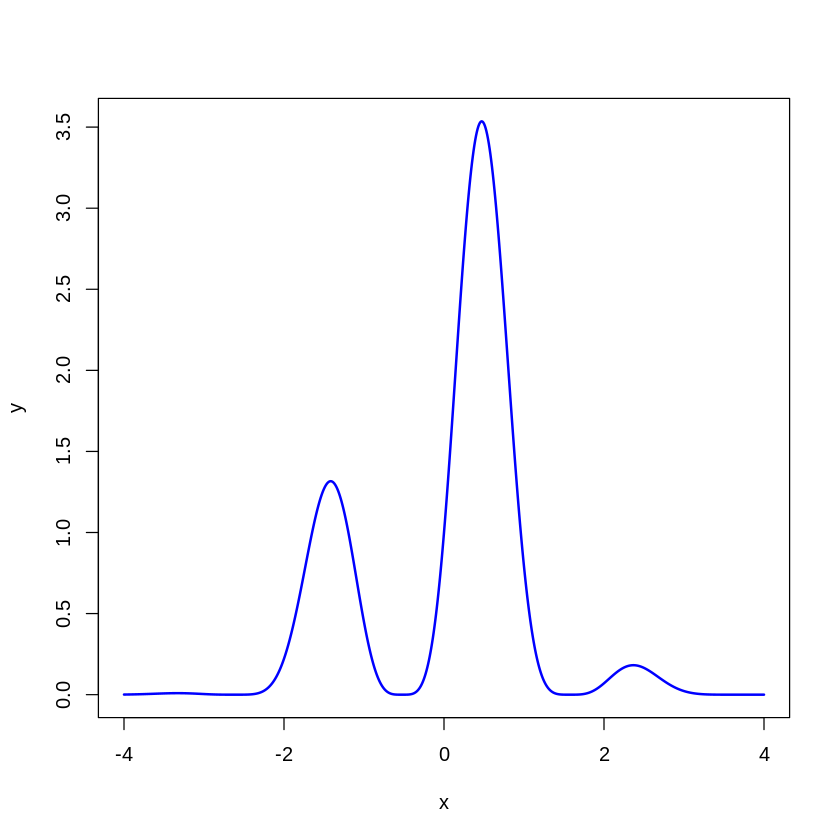

In [ ]:
x=seq(-4,4,0.01)
y=phi(x)
plot(x,y,type='l',col="blue",lwd=2)

In [ ]:
phi=function(x) {
  exp(-x^2 / 2) * (1 + sin(3 * x))^2
}
# Algoritmo de Metropolis
metropolis=function(N = 10000, sigma = 1, x0 = 0) {
  x=numeric(N)
  x[1]=x0
  for (t in 2:N) {
    xp=rnorm(1,x[t - 1],sigma)
    alpha=min(1,phi(xp)/phi(x[t - 1]))
    #print(alpha)
    if (runif(1) < alpha) {
      x[t]=xp
    } else {
      x[t]=x[t - 1]
    }
  }
 return(x)
}

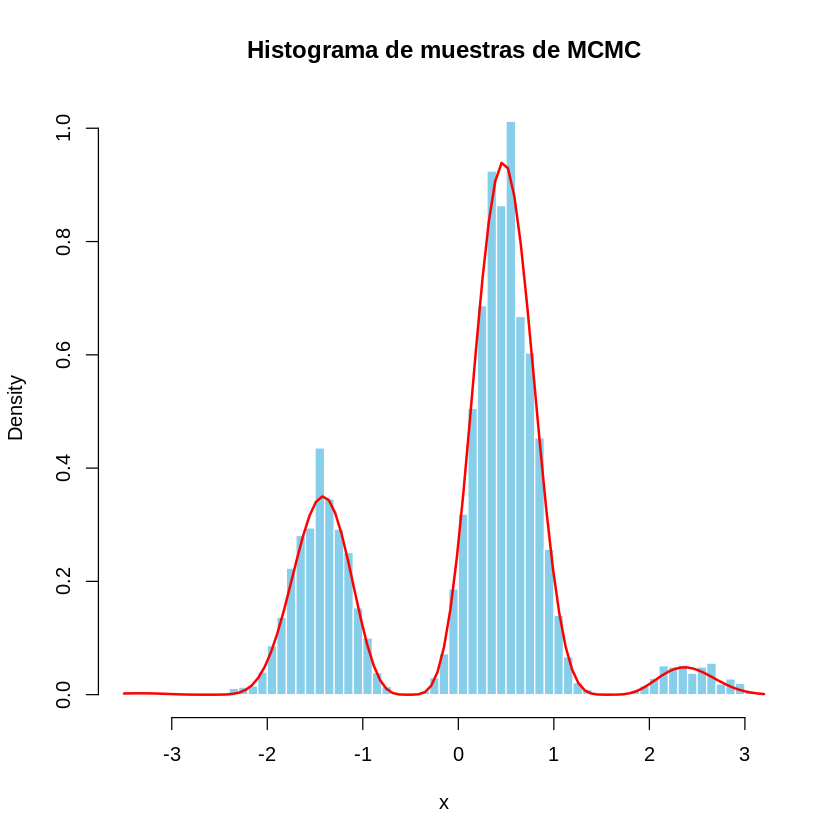

In [ ]:
set.seed(123)
muestra1=metropolis(N = 10000, sigma = 1, x0 = 0)
rango=1000
m=muestra1[(rango + 1):length(muestra1)]
hist(m, breaks = 50, probability = TRUE,
     main = "Histograma de muestras de MCMC",
     xlab = "x", col = "skyblue", border = "white")
# Superponer función objetivo (escalada)
curve(phi(x) / integrate(Vectorize(phi), -Inf, Inf)$value,
      add = TRUE, col = "red", lwd = 2)

Usamos una propuesta asimétrica: Distribución exponencial desplazada

$$x' ∼exp(1)+x_t$$
​

* $q(x' ∣ x_t )=λ⋅e^{−λ(x'−x_t)}$ para $x'>x_t$

* ​$q(x_t ∣ x' )=λ⋅e^{−λ(x_t−x')}$ para $x_t>x'$



1. Escoger un avlor inicial
2. En cada Iteracion

   * Generar $x' ∼rexp(1,\lambda=1)+x_t$
   * Calcular

   $$\alpha=min \left \{ 1,\frac{\pi (x')q(x_t|x')}{\pi (x_t)q(x'|x_t)} \right \}$$

   * Aceptar con probabilidad $\alpha$

In [ ]:
phi=function(x) {
  exp(-x^2 / 2) * (1 + sin(3 * x))^2
}
# METROPOLIS-HASTINGS: propuesta exponencial desplazada
MetropolisH=function(N = 10000, x0 = 0, lambda = 1) {
  x = numeric(N)
  x[1] = x0

  for (t in 2:N) {
    xt = x[t - 1]
    z = rexp(1,lambda)
    xp = xt + z  # solo hacia la derecha
    qp = dexp(z,lambda)
    qt = dexp(xp - xt,lambda)

    alpha = min(1, (phi(xp) * qt) / (phi(xt) * qp))

    if (runif(1) < alpha) {
      x[t] = xp
    } else {
      x[t] = xt
    }
  }
  return(x)
}

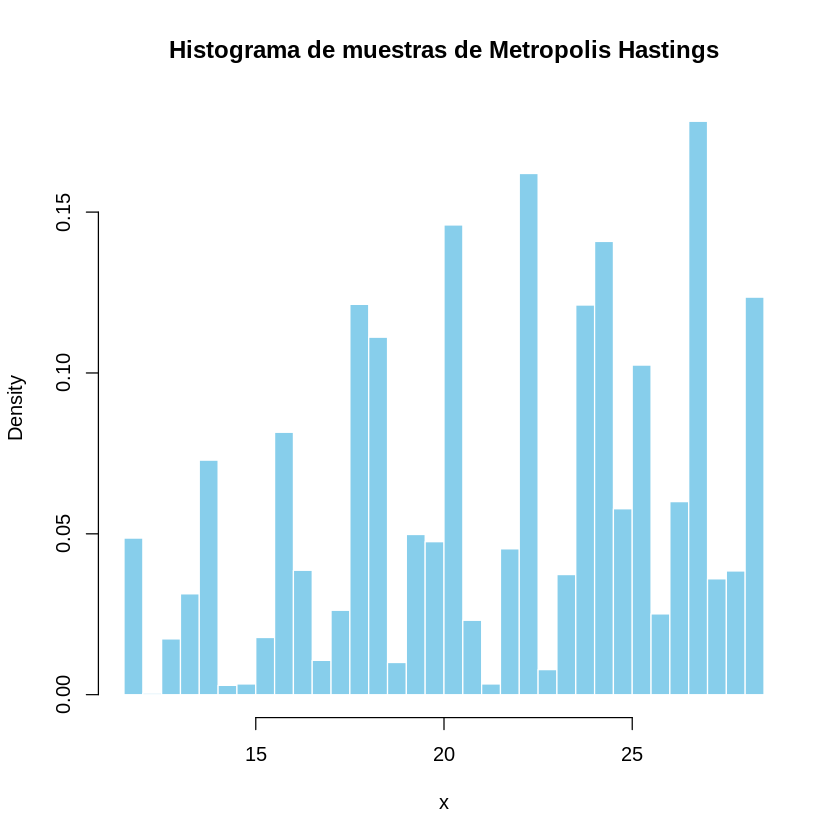

In [ ]:
set.seed(123)
muestra1=MetropolisH(N = 10000, x0 = 0, lambda = 1)
rango=9000
m=muestra1[1001:10000]
#m=muestra1[(rango + 1):length(muestra1)]
hist(m, breaks = 50, probability = TRUE,
     main = "Histograma de muestras de Metropolis Hastings",
     xlab = "x", col = "skyblue", border = "white")
# Superponer función objetivo (escalada)
#curve(phi(x) / integrate(Vectorize(phi), -Inf, Inf)$value,
#      add = TRUE, col = "red", lwd = 2)